In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression

import os

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

## 1. Load the tips dataset.

In [2]:
tips = data('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [4]:
tips['price_per_person'] = round(tips.total_bill / tips['size'], 2)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.49
2,10.34,1.66,Male,No,Sun,Dinner,3,3.45
3,21.01,3.50,Male,No,Sun,Dinner,3,7.00
4,23.68,3.31,Male,No,Sun,Dinner,2,11.84
5,24.59,3.61,Female,No,Sun,Dinner,4,6.15


### b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.2+ KB


In [24]:
num_vars = list(tips.select_dtypes(include=np.number).columns)
cat_vars = list(tips.select_dtypes(exclude=np.number).columns)

num_vars.remove('tip')

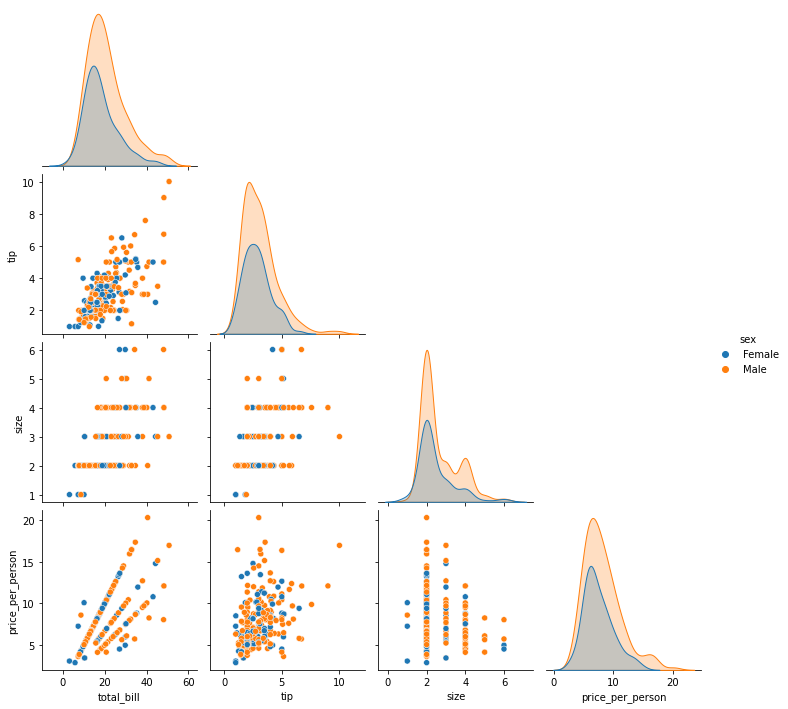

In [8]:
sns.pairplot(data=tips, corner=True, hue='sex');

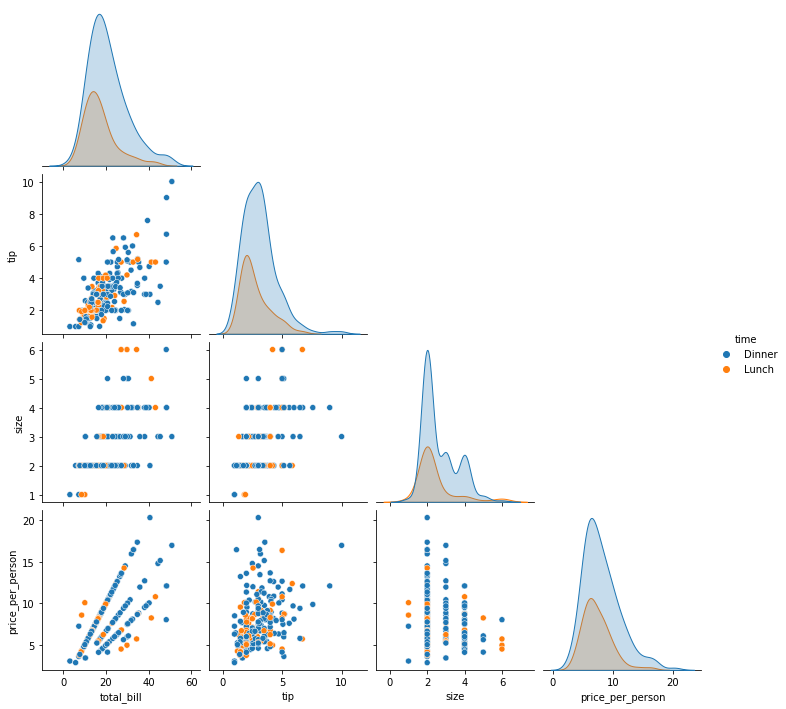

In [9]:
sns.pairplot(data=tips, corner=True, hue='time');

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


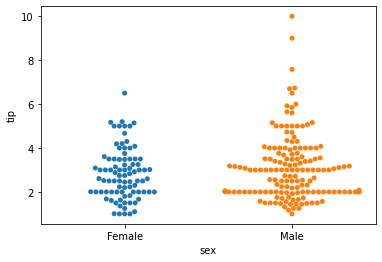

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


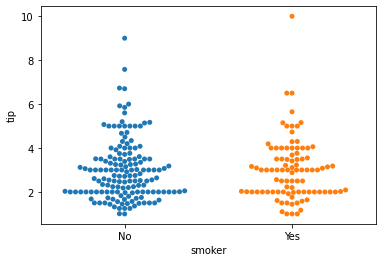

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


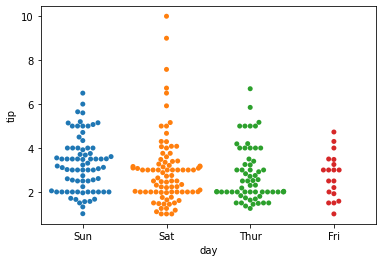

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64


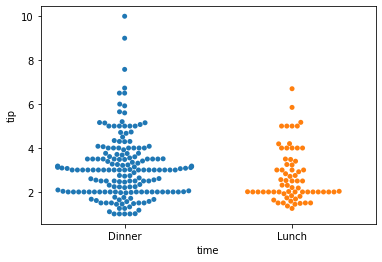

In [10]:
for col in cat_vars:
    print(tips.groupby(col).tip.mean())
    sns.swarmplot(data=tips, x=col, y='tip')
    plt.show()

***I think total_bill will be the most important to predict tip.***

### c. Use select k best to select the top 2 features for predicting tip amount. What are they?

In [25]:
X_train = tips[num_vars]
y_train = tips['tip']

In [48]:
y_train

1      1.01
2      1.66
3      3.50
4      3.31
5      3.61
       ... 
240    5.92
241    2.00
242    2.00
243    1.75
244    3.00
Name: tip, Length: 244, dtype: float64

In [26]:
# parameters: f_regression stats test, give me 2 features
f_selector = SelectKBest(f_regression, k=2)

# find the top 2 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [27]:
f_feature

['total_bill', 'size']

### d. Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [30]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=2)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.get_support()

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

rfe_feature

['total_bill', 'price_per_person']

### e. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

## 2. Write a function named ```select_kbest``` that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the ```SelectKBest``` class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [49]:
def select_kbest(X, y, k):
    # parameters: f_regression stats test, give me 2 features
    f_selector = SelectKBest(f_regression, k=k)

    # find the top k X's correlated with y
    f_selector.fit(X, y)

    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()

    # get list of top K features. 
    f_feature = X.iloc[:,feature_mask].columns.tolist()
    
    return f_feature

In [50]:
select_kbest(X_train, y_train, 2)

['total_bill', 'size']

## 3. Write a function named ```rfe``` that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the ```RFE``` class. Test your function with the ```tips``` dataset. You should see the same results as when you did the process manually.

In [51]:
def rfe(X, y, k):
    # initialize the ML algorithm
    lm = LinearRegression()

    # create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
    rfe = RFE(lm, n_features_to_select=k)

    # fit the data using RFE
    rfe.fit(X, y)  

    # get the mask of the columns selected
    feature_mask = rfe.get_support()

    # get list of the column names. 
    rfe_feature = X.iloc[:,feature_mask].columns.tolist()

    return rfe_feature

In [52]:
rfe(X_train, y_train, 2)

['total_bill', 'price_per_person']

## 4. Load the ```swiss``` dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [37]:
swiss = data('swiss')

In [38]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [53]:
X_swiss = swiss.drop(columns='Fertility')
y_swiss = swiss['Fertility']

In [55]:
select_kbest(X_swiss, y_swiss, 3)

['Examination', 'Education', 'Catholic']

In [56]:
rfe(X_swiss, y_swiss, 3)

['Examination', 'Education', 'Infant.Mortality']